In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import os
import numpy as np # Import numpy for handling potential NaN values
import openpyxl
from datetime import datetime 

### Setup

In [9]:
excel_file_path = 'data/excel_fooddesert/full_literature_list_2024-10-21(analyzing).xlsx'

In [5]:
output_dir = 'figures' # Output directory will be ../fooddesert_review-1/figures/
os.makedirs(output_dir, exist_ok=True)


In [13]:
try:
    df_lit = pd.read_excel(excel_file_path, engine = 'openpyxl')
except FileNotFoundError:
    print(f"Error: The file '{excel_file_path}' was not found.")
    print("Please ensure the file path is correct or upload the file.")
    exit()

In [14]:
unnamed_cols_mask = df_lit.columns.str.contains('Unnamed:')
df_lit = df_lit.loc[:, ~unnamed_cols_mask]

In [15]:
geo_cols = ['Research site', 'Country', 'Continent']
time_col = 'Publication Year'

In [16]:
for col in geo_cols:
    df_lit[col] = df_lit[col].fillna('Unknown')
    # Optional: Convert to string type to avoid issues
    df_lit[col] = df_lit[col].astype(str)

In [17]:
print(df_lit.columns)


Index(['Publication Type', 'Authors', 'Book Authors', 'Book Editors',
       'Book Group Authors', 'Author Full Names', 'Book Author Full Names',
       'Group Authors', 'Article Title', 'Source Title', 'Book Series Title',
       'Book Series Subtitle', 'Language', 'Conference Date',
       'Conference Location', 'Conference Sponsor', 'Conference Host',
       'Author Keywords', 'Keywords Plus', 'Abstract', 'Addresses',
       'Affiliations', 'Reprint Addresses', 'Email Addresses',
       'Researcher Ids', 'ORCIDs', 'Funding Orgs', 'Funding Name Preferred',
       'Funding Text', 'Cited References', 'Cited Reference Count',
       'Times Cited, WoS Core', 'Times Cited, All Databases',
       '180 Day Usage Count', 'Since 2013 Usage Count', 'Publisher',
       'Publisher City', 'Publisher Address', 'ISSN', 'eISSN', 'ISBN',
       'Journal Abbreviation', 'Journal ISO Abbreviation', 'Publication Date',
       'Publication Year', 'Volume', 'Issue', 'Part Number', 'Supplement',
       'Spe

In [18]:
df_lit[time_col] = pd.to_numeric(df_lit[time_col], errors='coerce')
df_lit.dropna(subset=[time_col], inplace=True)

df_lit[time_col] = df_lit[time_col].astype(int) # Convert to integer year

# Geographic Distribution Map

In [19]:
country_counts = df_lit[df_lit['Country'] != 'Unknown']['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Study Count']

In [21]:
import geodatasets

In [22]:
geodatasets.data

{'geoda': {'airbnb': {'url': 'https://geodacenter.github.io/data-and-lab//data/airbnb.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.airbnb',
   'description': 'Airbnb rentals, socioeconomics, and crime in Chicago',
   'geometry_type': 'Polygon',
   'nrows': 77,
   'ncols': 21,
   'details': 'https://geodacenter.github.io/data-and-lab//airbnb/',
   'hash': 'a2ab1e3f938226d287dd76cde18c00e2d3a260640dd826da7131827d9e76c824',
   'filename': 'airbnb.zip'},
  'atlanta': {'url': 'https://geodacenter.github.io/data-and-lab//data/atlanta_hom.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.atlanta',
   'description': 'Atlanta, GA region homicide counts and rates',
   'geometry_type': 'Polygon',
   'nrows': 90,
   'ncols': 24,
   'details': 'https://geodacenter.github.io/data-and-lab//atlanta_old/',
   'hash': 'a33a76e12168fe84361e60c88a9df4856730487305846c559715c89b1a2b5e09',
   'filename': 'atlanta_hom.zip',
   'members': ['atlanta_hom/atl_hom.geojson']},
  'cars': {'url': 'https://geodacenter.github.io/data-and-lab//data/Abandoned_Vehicles_Map.csv',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.cars',
   'description': '2011 abandoned vehicles in Chicago (311 complaints).',
   'geometry_type': 'Point',
   'nrows': 137867,
   'ncols': 21,
   'details': 'https://geodacenter.github.io/data-and-lab//1-source-and-description/',
   'hash': '6a0b23bc7eda2dcf1af02d43ccf506b24ca8d8c6dc2fe86a2a1cc051b03aae9e',
   'filename': 'Abandoned_Vehicles_Map.csv'},
  'charleston1': {'url': 'https://geodacenter.github.io/data-and-lab//data/CharlestonMSA.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.charleston1',
   'description': '2000 Census Tract Data for Charleston, SC MSA and counties',
   'geometry_type': 'Polygon',
   'nrows': 117,
   'ncols': 31,
   'details': 'https://geodacenter.github.io/data-and-lab//charleston-1_old/',
   'hash': '4a4fa9c8dd4231ae0b2f12f24895b8336bcab0c28c48653a967cffe011f63a7c',
   'filename': 'CharlestonMSA.zip',
   'members': ['CharlestonMSA/sc_final_census2.gpkg']},
  'charleston2': {'url': 'https://geodacenter.github.io/data-and-lab//data/CharlestonMSA2.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.charleston2',
   'description': '1998 and 2001 Zip Code Business Patterns (Census Bureau) for Charleston, SC MSA',
   'geometry_type': 'Polygon',
   'nrows': 42,
   'ncols': 60,
   'details': 'https://geodacenter.github.io/data-and-lab//charleston2/',
   'hash': '056d5d6e236b5bd95f5aee26c77bbe7d61bd07db5aaf72866c2f545205c1d8d7',
   'filename': 'CharlestonMSA2.zip',
   'members': ['CharlestonMSA2/CharlestonMSA2.gpkg']},
  'chicago_health': {'url': 'https://geodacenter.github.io/data-and-lab//data/comarea.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.chicago_health',
   'description': 'Chicago Health + Socio-Economics',
   'geometry_type': 'Polygon',
   'nrows': 77,
   'ncols': 87,
   'details': 'https://geodacenter.github.io/data-and-lab//comarea_vars/',
   'hash': '4e872adb552786eae2fcd745524696e5e4cd33cc9a6c032471c0e75328871401',
   'filename': 'comarea.zip'},
  'chicago_commpop': {'url': 'https://geodacenter.github.io/data-and-lab//data/chicago_commpop.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.chicago_commpop',
   'description': 'Chicago Community Area Population Percent Change for 2000 and 2010',
   'geometry_type': 'Polygon',
   'nrows': 77,
   'ncols': 9,
   'details': 'https://geodacenter.github.io/data-and-lab//commpop/',
   'hash': '1dbebb50c8ea47e2279ea819ef64ba793bdee2b88e4716bd6c6ec0e0d8e0e05b',
   'filename': 'c

In [23]:
world_path = geodatasets.get_path('naturalearth_land')
world = gpd.read_file(world_path)

In [24]:
world

,featurecla,scalerank,min_zoom,geometry
0,Land,1,1.0,"POLYGON ((-59.57209 -80.04018, -59.86585 -80.5..."
1,Land,1,1.0,"POLYGON ((-159.20818 -79.49706, -161.1276 -79...."
2,Land,1,0.0,"POLYGON ((-45.15476 -78.04707, -43.92083 -78.4..."
3,Land,1,1.0,"POLYGON ((-121.21151 -73.50099, -119.91885 -73..."
4,Land,1,1.0,"POLYGON ((-125.55957 -73.48135, -124.03188 -73..."
...,...,...,...,...
122,Land,1,1.0,"POLYGON ((51.13619 80.54728, 49.79368 80.41543..."
123,Land,0,0.0,"POLYGON ((99.93976 78.88094, 97.75794 78.7562,..."
124,Land,0,0.0,"POLYGON ((-87.02 79.66, -85.81435 79.3369, -87..."
125,Land,0,0.0,"POLYGON ((-68.5 83.10632, -65.82735 83.02801, ..."


In [29]:
print("\nWorld map country names sample:", world.index.unique()[:20]) # Show sample map names
print("Your data country names sample:", country_counts['Country'].unique()[:20]) # Show sample data names


World map country names sample: RangeIndex(start=0, stop=20, step=1)
Your data country names sample: ['USA' 'Canada' 'UK' 'International' 'Brazil' 'Uncertain' 'Japan'
 'Slovakia' 'Austrailia' 'Chile' 'Germany' 'Mexico' 'South Korea'
 'USA, Canada' 'Netherlands' 'France' 'China' 'South Africa' 'Colombia'
 'Belgium']


In [26]:
world = world.rename(columns={'name': 'CountryName_Geo'})

In [27]:
world_merged = world.merge(country_counts, left_on='CountryName_Geo', right_on='Country', how='left')

KeyError: 'CountryName_Geo'

In [ ]:
world_merged['Study Count'] = world_merged['Study Count'].fillna(0)


In [ ]:
# Plotting the choropleth map
fig_map, ax_map = plt.subplots(1, 1, figsize=(15, 10))
world_merged.plot(column='Study Count',
                  ax=ax_map,
                  legend=True,
                  cmap='viridis', # Choose a colormap (e.g., 'viridis', 'plasma', 'Blues')
                  legend_kwds={'label': "Number of Studies",
                               'orientation': "horizontal"},
                  missing_kwds={"color": "lightgrey"} # Color for countries not in data/merged
                  )
ax_map.set_title('Geographic Distribution of Food Desert Studies by Country')
ax_map.set_axis_off() # Hide axis
plt.tight_layout()


In [ ]:
# Save the figure
map_filename = os.path.join(output_dir, 'figure1_geographic_distribution_map.png')
plt.savefig(map_filename, dpi=300)
print(f"Figure 1 saved as {map_filename}")

# Continent/Country

In [30]:
continent_values = df_lit['Continent'].fillna('Unknown') # Handle potential NaNs if any
initial_continent_counts = continent_values[continent_values != 'Uncertain'].value_counts()
print(continent_values.value_counts)


<bound method IndexOpsMixin.value_counts of 0      North America
1      North America
2      North America
3      North America
4      North America
           ...      
842    North America
843    North America
844    North America
845    North America
846    North America
Name: Continent, Length: 847, dtype: object>


In [31]:
multi_continent_labels = [
    'International',
    'North America, Europe',
    'Africa, North America',
    'USA, Europe', # Treating this as multi-continent
    'North America, Asia, Europe',
    'Europe, Africa',
    'Oceania, Asia'
]
label_to_remove = 'America' # Ambiguous label to remove

In [32]:
valid_multi_labels = [label for label in multi_continent_labels if label in initial_continent_counts.index]
multi_continent_sum = initial_continent_counts.loc[valid_multi_labels].sum()

In [33]:
final_continent_counts = initial_continent_counts.copy()
final_continent_counts = final_continent_counts.drop(labels=valid_multi_labels, errors='ignore')
final_continent_counts = final_continent_counts.drop(labels=[label_to_remove], errors='ignore')

if multi_continent_sum > 0:
    final_continent_counts['*Multiple continents'] = multi_continent_sum

final_continent_counts = final_continent_counts.sort_values(ascending=False)
final_continent_counts

Continent
North America           665
Europe                   63
*Multiple continents     32
South America            29
Asia                     21
Africa                   10
Oceania                   8
Name: count, dtype: int64

In [34]:
# # --- Bar Chart by Continent ---
# continent_counts = df_lit[df_lit['Continent'] != 'Uncertain']['Continent'].value_counts()
# print("\nStudy counts per continent:")
# print(continent_counts)

/var/folders/35/wgy37z41777glxhwgpwbf2580000gn/T/ipykernel_492/1806891285.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=final_continent_counts.index, y=final_continent_counts.values, palette='viridis')


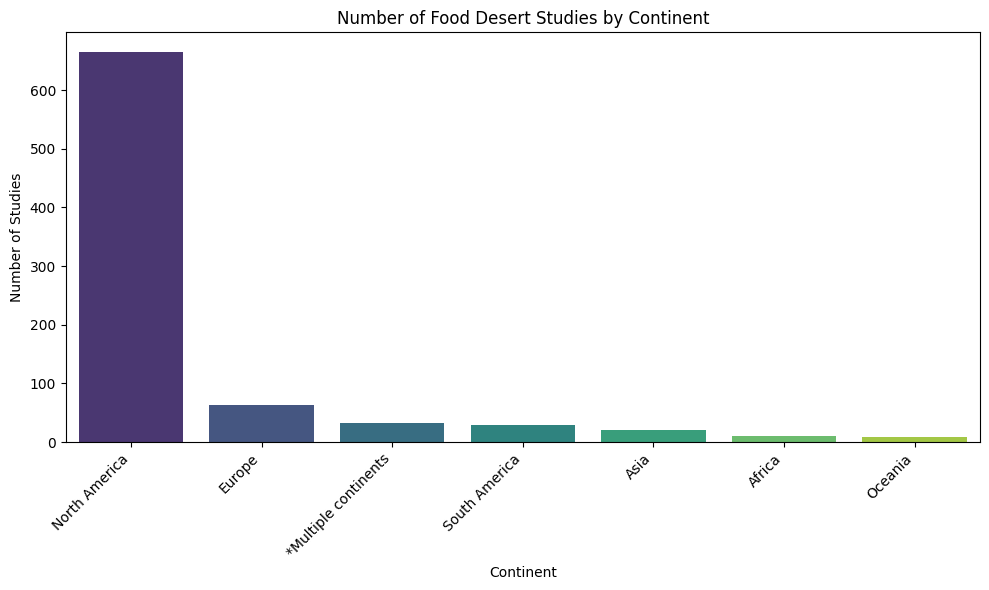

In [35]:
plt.figure(figsize=(10, 6))
sns.barplot(x=final_continent_counts.index, y=final_continent_counts.values, palette='viridis')
plt.title('Number of Food Desert Studies by Continent')
plt.ylabel('Number of Studies')
plt.xlabel('Continent')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

In [36]:
# Save the figure
continent_bar_filename = os.path.join(output_dir, 'figure2a_studies_by_continent.png')
plt.savefig(continent_bar_filename, dpi=300)
print(f"Figure 2a (Continent Bar Chart) saved as {continent_bar_filename}")

Figure 2a (Continent Bar Chart) saved as figures/figure2a_studies_by_continent.png


<Figure size 640x480 with 0 Axes>

In [37]:
### Country
country_values = df_lit['Country'].fillna('Unknown') # Handle potential NaNs if any

country_counts_series = country_values[country_values != 'Uncertain'].value_counts() 
country_counts_series

Country
USA                             626
Canada                           32
UK                               30
International                    25
Brazil                           21
Japan                             9
Slovakia                          8
Austrailia                        5
Chile                             5
Germany                           4
Mexico                            4
South Korea                       4
USA, Canada                       3
Netherlands                       3
France                            3
China                             3
South Africa                      3
Colombia                          2
Belgium                           2
Sweden                            2
Spain                             2
Kenya                             2
Hungary                           1
United States, China, Sweden      1
USA, Sweden                       1
Belgium, Uganda                   1
Austrailia, China                 1
Czech               

In [38]:
multi_country_labels = [
    'International',
    'USA, Canada',
    'USA, Mexico',
    'Kenya, Mexico', 
    'USA, Canada, Mexico, Denmark',
    'United States, China, Sweden',
    'Belgium, Uganda', 
    'Austrailia, China', 
    'Sweden, Italy, France', 
    'Senegal, Mali'
]

In [39]:
valid_multi_labels = [label for label in multi_country_labels if label in country_counts_series.index]
multi_country_sum = country_counts_series.loc[valid_multi_labels].sum()


In [40]:
final_country_counts = country_counts_series.drop(labels=valid_multi_labels, errors='ignore')
final_country_counts = final_country_counts.drop(labels=['Uncertain'], errors='ignore')

if multi_country_sum > 0:
    final_country_counts['*Multiple countries'] = multi_country_sum

final_country_counts = final_country_counts.sort_values(ascending=False)
final_country_counts

Country
USA                    626
*Multiple countries     36
Canada                  32
UK                      30
Brazil                  21
Japan                    9
Slovakia                 8
Austrailia               5
Chile                    5
Germany                  4
Mexico                   4
South Korea              4
Netherlands              3
France                   3
China                    3
South Africa             3
Spain                    2
Kenya                    2
Belgium                  2
Sweden                   2
Colombia                 2
Uganda                   1
Paraguay                 1
India                    1
Mozambique               1
Namibia                  1
Iran                     1
Australia                1
Poland                   1
New Zealand              1
Italy                    1
Czech                    1
Cyprus                   1
Solomon Islands          1
Lithuania                1
Croatia                  1
Iraq                

In [41]:
# --- Bar Chart by Top N Countries ---
top_n = 15 # Adjust N as needed
counts_to_plot = final_country_counts.head(top_n)


In [42]:
top_country_counts

NameError: name 'top_country_counts' is not defined

/var/folders/35/wgy37z41777glxhwgpwbf2580000gn/T/ipykernel_492/4220034813.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts_to_plot.values, y=counts_to_plot.index, palette='viridis', orient='h')


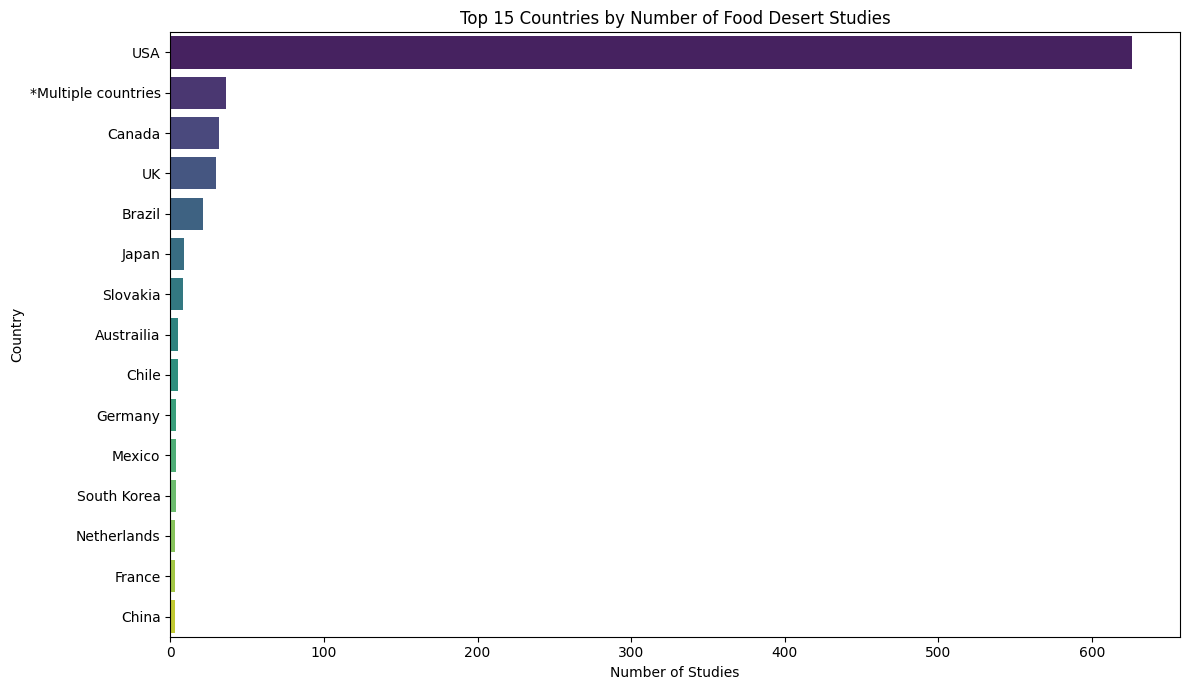

In [43]:
plt.figure(figsize=(12, 7))
sns.barplot(x=counts_to_plot.values, y=counts_to_plot.index, palette='viridis', orient='h')
plt.title(f'Top {top_n} Countries by Number of Food Desert Studies')
plt.xlabel('Number of Studies')
plt.ylabel('Country')
plt.tight_layout()

plt.show()

/var/folders/35/wgy37z41777glxhwgpwbf2580000gn/T/ipykernel_492/3571622309.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts_to_plot.values,


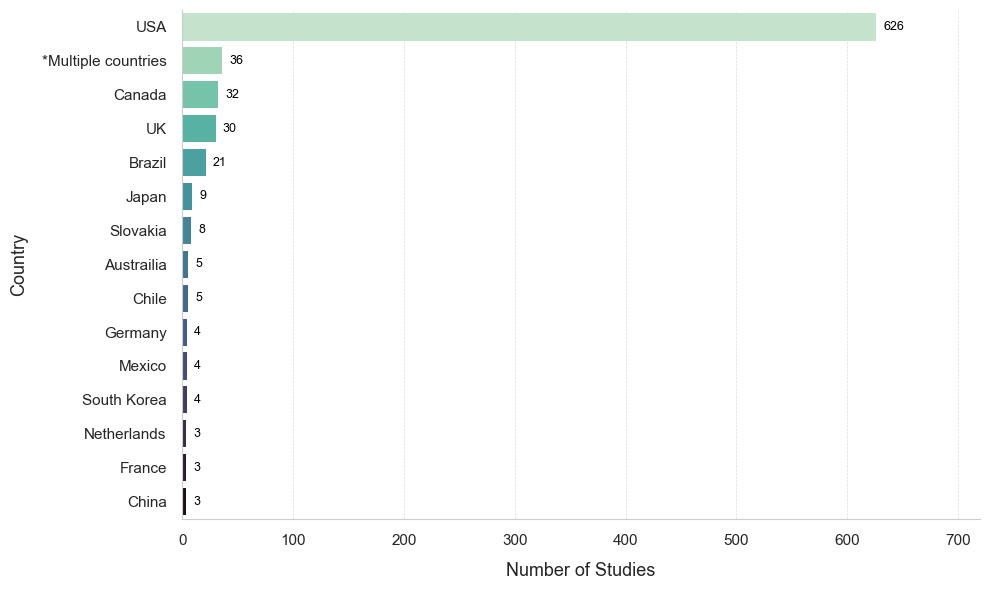

In [86]:
plt.style.use('seaborn-v0_8-whitegrid') 
fig_bar, ax_bar = plt.subplots(figsize=(10, 6)) 
palette = sns.color_palette("mako_r", n_colors=len(counts_to_plot)) # mako is also good and professional


# Create the barplot, assigning the Axes object to 'ax'
# Note: We pass 'ax=ax' to sns.barplot
sns.barplot(x=counts_to_plot.values,
            y=counts_to_plot.index,
            palette=palette,
            orient='h',
            ax=ax_bar)

# --- Add value labels to the bars ---
for i, bar in enumerate(ax_bar.patches): # Using ax_bar.patches is more direct
    width = bar.get_width()
    # Adjust text position based on bar width to avoid clutter for very small bars
    # and to ensure it's visible for very long bars.
    x_pos = width + (ax_bar.get_xlim()[1] * 0.01) # Small offset from the bar end

    ax_bar.text(x_pos,
                bar.get_y() + bar.get_height() / 2,
                f'{int(width)}',
                va='center',
                ha='left',
                fontsize=9, # Slightly increased font size
                color='black')

# Set title and labels using the axes object
# ax.set_title(f'Top {top_n} Countries by Number of Food Desert Studies')
ax_bar.set_xlabel('Number of Studies', fontsize=13, labelpad=10)
ax_bar.set_ylabel('Country', fontsize=13, labelpad=10)

ax_bar.tick_params(axis='x', labelsize=11)
ax_bar.tick_params(axis='y', labelsize=11)

max_val = counts_to_plot.values.max()
ax_bar.set_xlim(right=max_val * 1.15)

ax_bar.spines['top'].set_visible(False)
ax_bar.spines['right'].set_visible(False)
ax_bar.spines['left'].set_linewidth(0.8)
ax_bar.spines['bottom'].set_linewidth(0.8)

ax_bar.xaxis.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
ax_bar.yaxis.grid(False) # Typically no horizontal grid lines for horizontal bar charts


plt.tight_layout() 


In [45]:
# Save the figure
country_bar_grouped_filename_with_labels = os.path.join(output_dir, 'figure2b_studies_by_country_grouped_with_labels.png')
plt.savefig(country_bar_grouped_filename_with_labels, dpi=300)
print(f"Figure 2b (Grouped Country Bar Chart with Labels) saved as {country_bar_grouped_filename_with_labels}")


Figure 2b (Grouped Country Bar Chart with Labels) saved as figures/figure2b_studies_by_country_grouped_with_labels.png


<Figure size 640x480 with 0 Axes>

Most Frequently Studied Research Sites

In [46]:
site_counts = df_lit[df_lit['Research site'] != 'Unknown']['Research site'].value_counts().reset_index()
site_counts.columns = ['Research Site', 'Number of Studies']

In [47]:
top_site_n = 15 # Adjust N as needed
top_sites_table = site_counts.head(top_site_n).copy()

In [48]:
site_country_map = df_lit.groupby('Research site')['Country'].agg(lambda x: x.mode()[0] if not x.mode().empty else 'Unknown').to_dict()
top_sites_table['Country'] = top_sites_table['Research Site'].map(site_country_map)
top_sites_table

,Research Site,Number of Studies,Country
0,Uncertain,143,USA
1,National,61,USA
2,International,25,International
3,Pittsburgh,24,USA
4,North Carolina,22,USA
5,Baltimore,14,USA
6,Chicago,13,USA
7,Ohio,13,USA
8,California,10,USA
9,Philadelphia,10,USA


In [49]:
table1_filename = os.path.join(output_dir, 'table1_top_research_sites.csv')
top_sites_table.to_csv(table1_filename, index=False)
print(f"Table 1 data saved as {table1_filename}")

Table 1 data saved as figures/table1_top_research_sites.csv


# Temporal Trend by Geographic Region

In [50]:
current_year = datetime.now().year

In [51]:
df_lit_time_filtered = df_lit[
    (~df_lit['Continent'].isin(['Unknown', 'Uncertain', label_to_remove])) &
    (df_lit['Publication Year'] > 1980) &
    (df_lit['Publication Year'] < current_year) 
].copy()

In [52]:
df_lit_time_filtered.shape

(827, 65)

In [53]:
def group_continent(continent):
    if continent in multi_continent_labels:
        return '*Multiple continents'
    else:
        return continent # Keep single continents as they are

In [54]:
df_lit_time_filtered['Continent_Grouped'] = df_lit_time_filtered['Continent'].apply(group_continent)

In [55]:
temporal_continent_grouped_counts = df_lit_time_filtered.groupby(['Publication Year', 'Continent_Grouped']).size().unstack(fill_value=0)


In [58]:
temporal_continent_grouped_counts


Continent_Grouped,*Multiple continents,Africa,Asia,Europe,North America,Oceania,South America
Publication Year,,,,,,,
2000,0,0,0,1,0,0,0
2002,1,0,0,5,0,0,0
2003,0,0,0,3,0,0,0
2004,0,0,0,1,0,0,0
2005,0,1,0,1,1,0,0
2006,0,0,0,3,2,0,0
2007,0,0,0,1,2,0,0
2008,1,0,0,3,4,0,0
2009,0,0,0,0,6,2,0


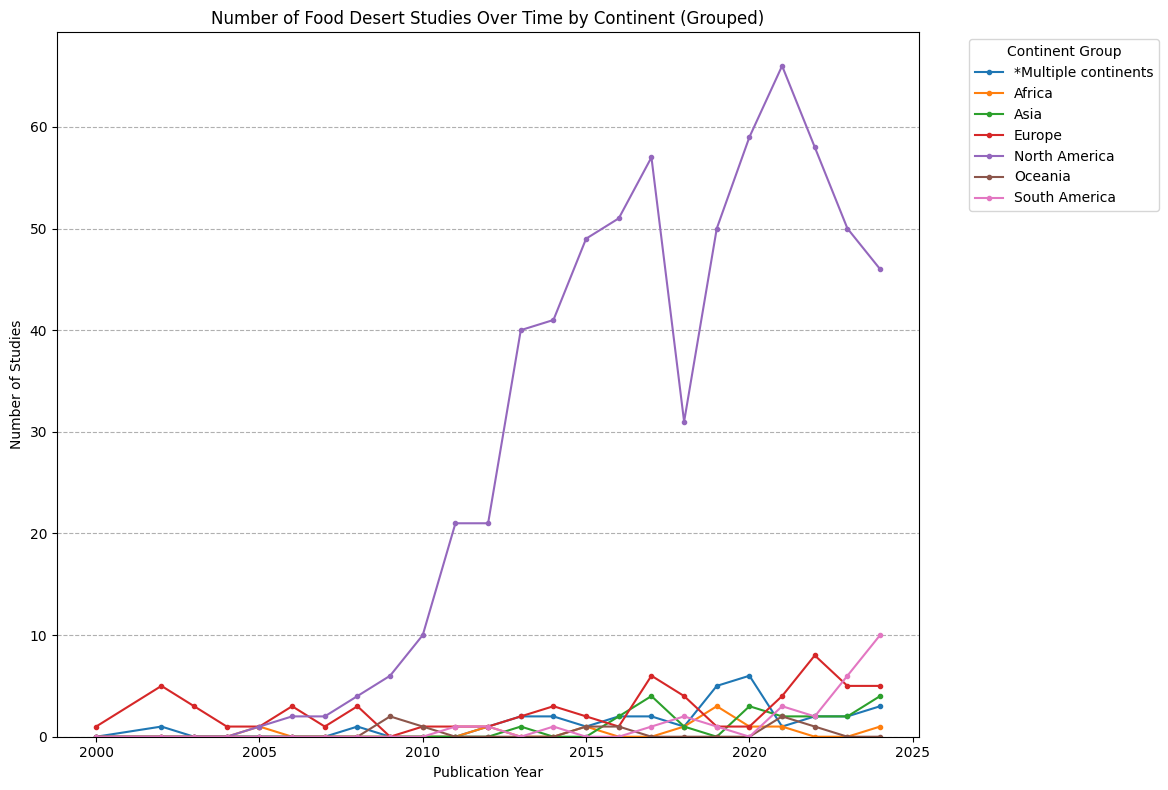

In [56]:
fig_time, ax_time = plt.subplots(figsize=(14, 8)) # Create figure and axes

# Plot the grouped data on the axes
temporal_continent_grouped_counts.plot(kind='line', marker='.', ax=ax_time) # Added markers for clarity

ax_time.set_title('Number of Food Desert Studies Over Time by Continent (Grouped)')
ax_time.set_xlabel('Publication Year')
ax_time.set_ylabel('Number of Studies')
ax_time.legend(title='Continent Group', bbox_to_anchor=(1.05, 1), loc='upper left')
ax_time.grid(True, axis='y', linestyle='--')

# Set y-axis to start from 0
ax_time.set_ylim(bottom=0)

plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout to make space for legend


In [62]:
plot_columns = [col for col in continent_order if col in temporal_continent_grouped_counts.columns]
num_plot_columns = len(plot_columns)

Could not set font to Helvetica. Ensure it's installed and accessible to Matplotlib. Error: name 'matplotlib' is not defined
Falling back to default sans-serif font.


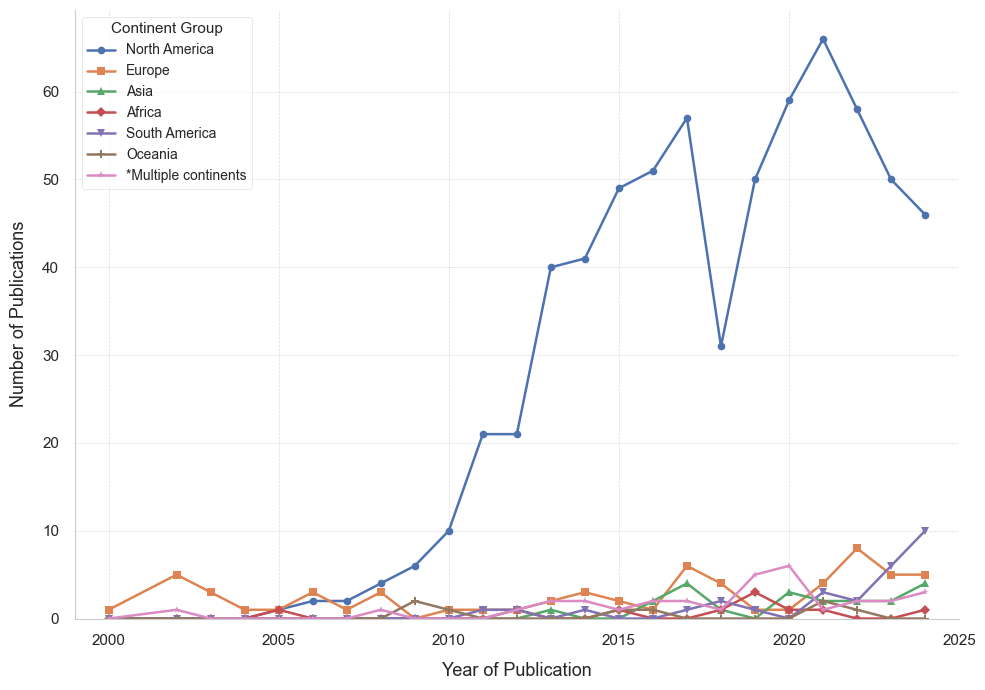

In [78]:
try:
    matplotlib.rcParams['font.family'] = 'sans-serif'
    matplotlib.rcParams['font.sans-serif'] = 'Helvetica'
    # For specific elements, you might need to set them individually if the global setting doesn't cascade as expected.
    # For example, for title, labels, and ticks:
    matplotlib.rcParams['axes.titlefont'] = {'family':'sans-serif', 'sans-serif':['Helvetica']}
    matplotlib.rcParams['axes.labelfont'] = {'family':'sans-serif', 'sans-serif':['Helvetica']}
    matplotlib.rcParams['xtick.fontfamily'] = {'family':'sans-serif', 'sans-serif':['Helvetica']}
    matplotlib.rcParams['ytick.fontfamily'] = {'family':'sans-serif', 'sans-serif':['Helvetica']}
    matplotlib.rcParams['legend.fontfamily'] = {'family':'sans-serif', 'sans-serif':['Helvetica']}

except Exception as e:
    print(f"Could not set font to Helvetica. Ensure it's installed and accessible to Matplotlib. Error: {e}")
    print("Falling back to default sans-serif font.")

plt.style.use('seaborn-v0_8-poster')
fig_time_professional, ax_time_professional = plt.subplots(figsize=(12, 7))

continent_order = [
    'North America',
    'Europe',
    'Asia',
    'Africa',
    'South America',
    'Oceania',
    '*Multiple continents'
]

colors = sns.color_palette("deep", n_colors=num_plot_columns)
styles = ['-', '--', '-.', ':', (0, (3, 1, 1, 1)), (0, (5, 5)), (0, (1, 1))]
markers = ['o', 's', '^', 'D', 'v', 'P', '*']

# Plot each continent group with customized styles
for i, continent in enumerate(plot_columns):
    ax_time_professional.plot(temporal_continent_grouped_counts.index,
                              temporal_continent_grouped_counts[continent],
                              label=continent,
                              color=colors[i % len(colors)],
                            #   linestyle=styles[i % len(styles)],
                              marker=markers[i % len(markers)],
                              markersize=5.5,
                              linewidth=1.8)

min_year_plot = temporal_continent_grouped_counts.index.min()
max_year_data = temporal_continent_grouped_counts.index.max()
current_year = datetime.now().year
max_year_plot_limit = min(current_year + 1 , max_year_data + 1)

# ax_time_professional.set_title(f'Global Trends in Food Desert Research by Continent ({min_year_plot}-{max_year_data})', fontsize=15, pad=18, weight='bold')
ax_time_professional.set_xlabel('Year of Publication', fontsize=13, labelpad=10)
ax_time_professional.set_ylabel('Number of Publications', fontsize=13, labelpad=10)

ax_time_professional.tick_params(axis='x', labelsize=11)
ax_time_professional.tick_params(axis='y', labelsize=11)

ax_time_professional.set_xlim(min_year_plot - 1, max_year_plot_limit)
ax_time_professional.set_ylim(bottom=0)

# --- MODIFIED LEGEND PLACEMENT ---
legend = ax_time_professional.legend(title='Continent Group',
                                      fontsize=10,
                                      title_fontsize=11,
                                      loc='upper left', # Changed to 'upper left' for inside plot
                                      frameon=True,     # Keep frame for better readability over lines
                                      edgecolor='lightgray', # Softer edge color
                                      facecolor='white', # White background for frame
                                      framealpha=0.7)    # Make frame slightly transparent

ax_time_professional.spines['top'].set_visible(False)
ax_time_professional.spines['right'].set_visible(False)
ax_time_professional.spines['left'].set_linewidth(0.8)
ax_time_professional.spines['bottom'].set_linewidth(0.8)

ax_time_professional.yaxis.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
ax_time_professional.xaxis.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

plt.tight_layout(rect=[0, 0, 0.83, 1])


In [ ]:
temporal_filename = os.path.join(output_dir, 'figure3_temporal_trend_by_continent.png')
plt.savefig(temporal_filename, dpi=300)
print(f"Figure 3 saved as {temporal_filename}")

In [57]:
# plt.figure(figsize=(14, 8))
# temporal_continent_counts.plot(kind='line', ax=plt.gca()) # Use 'area' for stacked area chart
# plt.title('Number of Food Desert Studies Over Time by Continent')
# plt.xlabel('Publication Year')
# plt.ylabel('Number of Studies')
# plt.legend(title='Continent', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.grid(True, axis='y', linestyle='--')
# plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout to make space for legend

# plt.show